## Under Sampling
Good for large sets of datasets

In [11]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

RANDOM_SEED = 42
LABELS = ['Normal', 'Fraud']
print('Loading Libraries')

Loading Libraries


In [12]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [14]:
# Create independent and Dependent Features
columns = list(data.columns)
print(columns)
target = 'Class'

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [15]:
columns = [c for c in columns if c not in [target]]
print(columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [16]:
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Exploratory Data Analysis

In [17]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

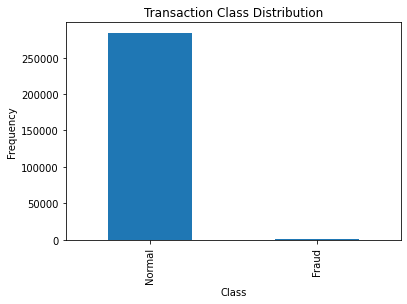

In [18]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar')
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

In [19]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [20]:
from imblearn.under_sampling import NearMiss

In [22]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, Y)

In [23]:
print(X_res.shape, y_res.shape)

(984, 30) (984,)


In [30]:
from collections import Counter
print('Original Dataset shape: %s'%Counter(Y))
print('Resampled dataset shape: %s'%Counter(y_res))

Original Dataset shape: Counter({0: 284315, 1: 492})
Resampled dataset shape: Counter({0: 492, 1: 492})


In [28]:
print(Counter(Y))

Counter({0: 284315, 1: 492})


## Oversampling

Increase the under-represented 492 samples to 284315. To increase the samples, we artificially create the 492 by making more values within the distribution of 492 data, that way we don't lose 284315 data

In [31]:
from imblearn.combine import SMOTETomek

In [32]:
# implement oversampling for handling imbalanced
smk = SMOTETomek()
X_res, y_res = smk.fit_resample(X,Y)

In [33]:
print(X_res.shape, y_res.shape)

(567520, 30) (567520,)


In [34]:
print('Original Dataset shape: %s'%Counter(Y))
print('Resampled dataset shape: %s'%Counter(y_res))

Original Dataset shape: Counter({0: 284315, 1: 492})
Resampled dataset shape: Counter({0: 283760, 1: 283760})


# Another way

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
os = RandomOverSampler(sampling_strategy = 0.5)

In [47]:
X_res, y_res = os.fit_resample(X,Y)

In [48]:
print(X_res.shape, y_res.shape)

(426472, 30) (426472,)


In [49]:
print('Original Dataset shape: %s'%Counter(Y))
print('Resampled dataset shape: %s'%Counter(y_res))

Original Dataset shape: Counter({0: 284315, 1: 492})
Resampled dataset shape: Counter({0: 284315, 1: 142157})
